In [1]:
!pip install numpy pydicom opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.5 MB/s eta 0:00:00


In [22]:
import sys
sys.path.append('../../code/')
import util.util as util
import numpy as np
import pydicom as dicom
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# example here is a breast with the following parameters:
# density = 'fatty'
# mass density = '1.0'
# dose = 8.88e+09
# mass size = 7.0
# run id = 8336192
# example id = 101

Step 1: load and open dicom file


In [28]:
filename_mhd = '../example_data/projection_DM101.mhd'
filename_raw = '../example_data/projection_DM101.raw'
data = util.read_mhd(filename_mhd)
pixel_array = np.fromfile(filename_raw, dtype="float32").reshape(
    data["NDims"], data["DimSize"][1], data["DimSize"][0]
)
tmp = pixel_array[0]

Step 2: plot image and location of the lesion

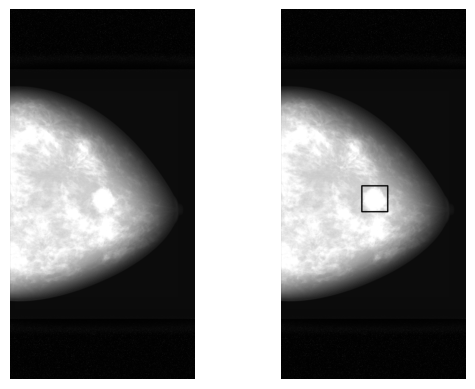

In [30]:
bounds_saved = np.load('../example_data/bounds_fatty.npy',allow_pickle=True)
# tmp = arr#[bounds_saved[0], bounds_saved[1]]

X = np.std(tmp) * 2
TH = np.mean(tmp)
tmp[tmp < TH - X] = 0
tmp[tmp > TH + X] = X+TH


fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(np.rot90(tmp, k=-1, axes=(1, 0)), cmap="gray")
ax1.axis("off")

locFile = '../example_data/projection_DM101.loc' # file that stores coordinates of lesion
file = open(locFile, "r")
lines = file.readlines()
file.close()

coords = [int(v) for v in lines[0].strip().split(" ")[0:2]]


l_mask = np.ones((tmp.shape[0], tmp.shape[1])) *255.
box_side = 100 ##100 size 5, 125 size 7,  150 size 9
l_mask[
    coords[0] - box_side : coords[0] + box_side,
    coords[1] - box_side : coords[1] + box_side,
] = 50

SL = 10
l_mask[
    coords[0] - box_side + SL : coords[0] + box_side - SL,
    coords[1] - box_side + SL : coords[1] + box_side - SL,
] = 255

x1 = coords[1] - box_side
y1 = coords[0] - box_side
x2 = coords[1] + box_side + SL
y2 = coords[0] + box_side + SL

ax2.imshow(tmp)
tmp1 = np.array(tmp)
cv2.rectangle(tmp1, (x1,y1), (x2,y2), color=(0, 0, 0), thickness=10)

ax2.axis("off")
plt.imshow(np.rot90(tmp1), cmap='gray')


(-0.5, 1198.5, 1573.5, -0.5)

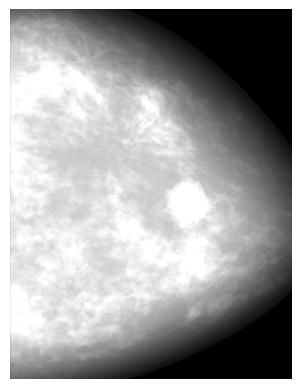

In [31]:
# bounds_saved = np.load(bounds_name,allow_pickle=True)

tmp = tmp[bounds_saved[0], bounds_saved[1]]

plt.imshow(np.rot90(tmp/255.), cmap='gray')
plt.axis("off")